# Set Up

## Import Packages

In [1]:
from __future__ import print_function
from six.moves import zip, range
import pandas as pd
from collections import OrderedDict
import math

import pandas as pd
import recordlinkage
from recordlinkage.preprocessing import clean


import sys
sys.path.append('/Users/mattia/Desktop/MatchAnalysis_Imputation/Progetto/Funzioni')
from funzioni import alfabeto


path_data_lake = "/Users/mattia/Desktop/MatchAnalysis_Imputation/Progetto/Data Lake"

## Load the Data

In [2]:
agoda_terni = pd.read_csv(f'{path_data_lake}/agoda_Terni.csv')
booking_terni = pd.read_csv(f'{path_data_lake}/booking_Terni.csv')

booking_roma = pd.read_csv(f'{path_data_lake}/booking_Roma.csv')
agoda_roma = pd.read_csv(f'{path_data_lake}/agoda_Roma.csv')

# Data Cleaning

In [3]:
agoda_terni.head(2)

,Unnamed: 0,titolo,recensione_voto_numerico,recensione_voto_parola,numero_recensioni,date,permanenza,prezzo,indirizzo,valutazione
0,0,Hotel Valentino,"9,0",Eccezionale,2 recensioni,1 agosto - 2 agosto,"1 notte, 2 adulti",258 €,"Terni, Terni",4.0
1,1,Hotel Garden Terni,"7,9",Ottimo,505 recensioni,1 agosto - 2 agosto,"1 notte, 2 adulti",138 €,"Terni, Terni",4.0


In [ ]:
# Aggiungere variabili e modificarle (feature engeneering)
## Estrarre solo il primo nome, assegnarlo a variabile 'città'
agoda_terni['città'] = agoda_terni['indirizzo'].str.split(',').str[0].str.strip()
agoda_terni['comune'] = agoda_terni['indirizzo'].str.split(',').str[0].str.strip()

## Creare nuova variabile città, utile in seguito
booking_terni['città'] = booking_terni['indirizzo']

## Rinominare città Papigno come Terni
agoda_terni.loc[agoda_terni['città'] == 'Papigno', 'città'] = 'Terni'

## Creare variabile città
booking_roma['città']='Roma'
agoda_roma['città']='Roma'

# Facciamo merge dei due dataset separatamente per agoda e booking
## Unione dei dataset Agoda
agoda = pd.concat([agoda_terni, agoda_roma], ignore_index=True)

## Unione dei dataset Booking
booking = pd.concat([booking_terni, booking_roma], ignore_index=True)


['Terni' 'San Gemini' 'Narni' 'Stroncone' 'Montefranco'
 "Calvi dell' Umbria" 'Papigno']



For the purposes of our analysis, we only want to know a title. Let's toss the other columns so we have something more manageable to work with.

In [ ]:
agoda["titolo"]=agoda.titolo.apply(lambda x: alfabeto(x))

booking["titolo"]=booking.titolo.apply(lambda x: alfabeto(x))

In [189]:
# Take a first look at the data
agoda.head()

,Unnamed: 0,titolo,recensione_voto_numerico,recensione_voto_parola,numero_recensioni,date,permanenza,prezzo,indirizzo,valutazione,città
0,0,hotel valentino,"9,0",Eccezionale,2 recensioni,1 agosto - 2 agosto,"1 notte, 2 adulti",258 €,"Terni, Terni",4.0,Terni
1,1,garden hotel terni,"7,9",Ottimo,505 recensioni,1 agosto - 2 agosto,"1 notte, 2 adulti",138 €,"Terni, Terni",4.0,Terni
2,2,hotel michelangelo palace spa,"8,0",Fantastico,718 recensioni,1 agosto - 2 agosto,"1 notte, 2 adulti",174 €,"Terni, Terni",4.0,Terni
3,3,classic hotel tulipano,"7,6",Ottimo,453 recensioni,1 agosto - 2 agosto,"1 notte, 2 adulti",98 €,"Terni, Terni",3.0,Terni
4,4,de hotel paris,"8,1",Fantastico,11 recensioni,1 agosto - 2 agosto,"1 notte, 2 adulti",69 €,"Terni, Terni",3.0,Terni


In [190]:
booking.head()

,Unnamed: 0,titolo,recensione_voto_numerico,recensione_voto_parola,numero_recensioni,date,permanenza,prezzo,distanza_centro,indirizzo,stelle,valutazione_booking,descrizione_camera,configurazione_camera,descrizione_unprocessed,città
0,0,de hotel paris,"7,2",Buono,869 recensioni,1 agosto - 2 agosto,"1 notte, 2 adulti",€ 69,"0,9 km dal centro",Terni,3.0,NaN,Camera Doppia con Letti Singoli,Configurazione camera non disponibile,Camera Doppia con Letti Singoli2 letti singoli...,Terni
1,1,bb cospea,"9,0",Eccellente,674 recensioni,1 agosto - 2 agosto,"1 notte, 2 adulti",€ 55,"1,7 km dal centro",Terni,NaN,3.0,Camera Doppia con Letti Singoli,Configurazione camera non disponibile,Camera Doppia con Letti Singoli2 letti singoli...,Terni
2,2,bedbreakfast rosy,"9,0",Eccellente,330 recensioni,1 agosto - 2 agosto,"1 notte, 2 adulti",€ 77,1 km dal centro,Terni,NaN,4.0,Camera Matrimoniale con Bagno Privato Esterno,Configurazione camera non disponibile,Camera Matrimoniale con Bagno Privato Esterno ...,Terni
3,3,angolo bb verde,"8,6",Favoloso,219 recensioni,1 agosto - 2 agosto,"1 notte, 2 adulti",€ 69,"2,6 km dal centro",Terni,NaN,3.0,Camera Matrimoniale,Configurazione camera non disponibile,Camera Matrimoniale1 letto matrimoniale alla f...,Terni
4,4,filomena guest house santa,"9,7",Eccezionale,11 recensioni,1 agosto - 2 agosto,"1 notte, 2 adulti",€ 74,1 km dal centro,Terni,NaN,3.0,Camera Tripla,Configurazione camera non disponibile,"Camera Tripla2 letti (1 singolo, 1 matrimonial...",Terni


In [191]:
# List of columns to keep
selected_columns = ['titolo','prezzo', 'indirizzo','città','numero_recensioni','valutazione_booking']

# Subset data frame to only include those columns
booking_reduced = booking[selected_columns]


In [192]:
# Look at the updated dataframe
booking_reduced.head()

,titolo,prezzo,indirizzo,città,numero_recensioni,valutazione_booking
0,de hotel paris,€ 69,Terni,Terni,869 recensioni,NaN
1,bb cospea,€ 55,Terni,Terni,674 recensioni,3.0
2,bedbreakfast rosy,€ 77,Terni,Terni,330 recensioni,4.0
3,angolo bb verde,€ 69,Terni,Terni,219 recensioni,3.0
4,filomena guest house santa,€ 74,Terni,Terni,11 recensioni,3.0


In [193]:
selected_columns = ['titolo','prezzo', 'indirizzo','città','numero_recensioni','valutazione']
agoda_reduced = agoda[selected_columns]
agoda_reduced.head()

,titolo,prezzo,indirizzo,città,numero_recensioni,valutazione
0,hotel valentino,258 €,"Terni, Terni",Terni,2 recensioni,4.0
1,garden hotel terni,138 €,"Terni, Terni",Terni,505 recensioni,4.0
2,hotel michelangelo palace spa,174 €,"Terni, Terni",Terni,718 recensioni,4.0
3,classic hotel tulipano,98 €,"Terni, Terni",Terni,453 recensioni,3.0
4,de hotel paris,69 €,"Terni, Terni",Terni,11 recensioni,3.0


#pulizia variabile indirizzo

In [194]:
#nuova pulizia indirizzo
agoda_reduced['indirizzo'] = (
    agoda_reduced['indirizzo']
    .str.lower()  # tutto minuscolo
    .str.replace(r'\s*-\s*.*$', '', regex=True)  # rimuove tutto dopo il trattino incluso
    .str.replace(r',?\s*roma\b', '', regex=True)  # rimuove "roma" opzionalmente preceduta da virgola
    .str.replace(r'\bcentrale\b', '', regex=True)  # rimuove "centrale" come parola intera
    .str.replace(r'\b(rione|piazza|fontana|di|del|e|città|citta|citt)\b', '', regex=True)  # rimuove parole specificate
    .str.replace(r'\s+', ' ', regex=True)  # rimuove spazi multipli eventualmente lasciati
    .str.strip()  # rimuove spazi iniziali/finali
)


/var/folders/j4/9fk3st2d30g22vff83pj6cnw0000gn/T/ipykernel_4013/3028220868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agoda_reduced['indirizzo'] = (


In [195]:
agoda_reduced.indirizzo.unique()

array(['terni, terni', 'san gemini, san gemini', 'narni, narni',
       'stroncone, stroncone', 'montefranco, montefranco',
       "calvi dell' umbria, terni", 'papigno, papigno',
       'stazione termini', 'via veneto', 'trionfale', 'appio latino',
       'pantheon', 'eur garbatella', 'aurelio monteverde',
       'aeroporto fiumicino', 'ovest', 'nord', 'est', 'trastevere',
       'trevi', 'vaticano', 'flaminio parioli', 'boccea', 'nomentano',
       'navona', 'monti', 'colosseo foro romano', 'policlinico',
       'aeroporto ciampino', 'ostia', 'spagna', 'san giovanni'],
      dtype=object)

In [196]:
booking_reduced['indirizzo'] = (
    booking_reduced['indirizzo']
    .str.lower()  # tutto minuscolo
   .str.replace(r',?\s*roma\b', '', regex=True)  # rimuove "roma" opzionalmente preceduta da virgola
    .str.replace(r'\bcentrale\b', '', regex=True)  # rimuove "centrale" come parola intera
    .str.replace(r'\b(rione|piazza|fontana|di|del|e|città|citta|citt)\b', '', regex=True)  # rimuove parole specificate
    .str.replace(r'\s+', ' ', regex=True)  # rimuove spazi multipli eventualmente lasciati
    .str.strip())

/var/folders/j4/9fk3st2d30g22vff83pj6cnw0000gn/T/ipykernel_4013/473422012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_reduced['indirizzo'] = (


In [197]:
booking_reduced.indirizzo.unique()

array(['terni', 'trionfale', 'pantheon', 'villa borghese/parioli',
       'stazione termini', 'gianicolense', 'monti', '', 'centro',
       'san giovanni', 'navona', 'vaticano prati', 'trevi', 'via veneto',
       'spagna', 'trastevere', 'colosseo', 'aventino', 'tor quinto',
       'ostiense', 'eur', 'nomentano', 'magliana vecchia',
       'giuliano-dalmata', 'fonte ostiense', 'aurelio', 'appio latino',
       'portuense', 'torrino', 'monte sacro', 'san lorenzo', 'tiburtino',
       'ardeatino'], dtype=object)

In [198]:
agoda_reduced.head()

,titolo,prezzo,indirizzo,città,numero_recensioni,valutazione
0,hotel valentino,258 €,"terni, terni",Terni,2 recensioni,4.0
1,garden hotel terni,138 €,"terni, terni",Terni,505 recensioni,4.0
2,hotel michelangelo palace spa,174 €,"terni, terni",Terni,718 recensioni,4.0
3,classic hotel tulipano,98 €,"terni, terni",Terni,453 recensioni,3.0
4,de hotel paris,69 €,"terni, terni",Terni,11 recensioni,3.0


In [199]:
booking_reduced.head()

,titolo,prezzo,indirizzo,città,numero_recensioni,valutazione_booking
0,de hotel paris,€ 69,terni,Terni,869 recensioni,NaN
1,bb cospea,€ 55,terni,Terni,674 recensioni,3.0
2,bedbreakfast rosy,€ 77,terni,Terni,330 recensioni,4.0
3,angolo bb verde,€ 69,terni,Terni,219 recensioni,3.0
4,filomena guest house santa,€ 74,terni,Terni,11 recensioni,3.0


Great! Now we have what we need to do our analysis, and not a whole lot of extraneous information. Let's move on to preprocessing.

# pulizia titolo da parole roma e rome

In [200]:
#nuova pulizia indirizzo
agoda_reduced['titolo'] = (
    agoda_reduced['titolo']
    .str.lower()  # tutto minuscolo
    .str.replace(r'\s*-\s*.*$', '', regex=True)  # rimuove tutto dopo il trattino incluso
    .str.replace(r',?\s*roma\b', '', regex=True)  # rimuove "roma" opzionalmente preceduta da virgola
    .str.replace(r',?\s*rome\b', '', regex=True)  # rimuove "centrale" come parola intera
    .str.strip()  # rimuove spazi iniziali/finali
)

/var/folders/j4/9fk3st2d30g22vff83pj6cnw0000gn/T/ipykernel_4013/2607220419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agoda_reduced['titolo'] = (


In [201]:
#nuova pulizia indirizzo
booking_reduced['titolo'] = (
    booking_reduced['titolo']
    .str.lower()  # tutto minuscolo
    .str.replace(r'\s*-\s*.*$', '', regex=True)  # rimuove tutto dopo il trattino incluso
    .str.replace(r',?\s*roma\b', '', regex=True)  # rimuove "roma" opzionalmente preceduta da virgola
    .str.replace(r',?\s*rome\b', '', regex=True)  # rimuove "centrale" come parola intera
    .str.strip()  # rimuove spazi iniziali/finali
)

/var/folders/j4/9fk3st2d30g22vff83pj6cnw0000gn/T/ipykernel_4013/600013662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_reduced['titolo'] = (


# pulizia prezzo

In [202]:
# Funzione di pulizia prezzo
def pulisci_prezzo(colonna):
    return (
        colonna
        .str.replace('€', '', regex=False)  # rimuove il simbolo €
        .str.replace(',', '', regex=False)  # rimuove eventuali separatori come 1,200
        .str.strip()  # rimuove spazi
        .astype(float)  # converte in numero
    )

# Applica la pulizia
booking_reduced['prezzo'] = pulisci_prezzo(booking_reduced['prezzo'])
agoda_reduced['prezzo'] = pulisci_prezzo(agoda_reduced['prezzo'])

/var/folders/j4/9fk3st2d30g22vff83pj6cnw0000gn/T/ipykernel_4013/1397819868.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_reduced['prezzo'] = pulisci_prezzo(booking_reduced['prezzo'])
/var/folders/j4/9fk3st2d30g22vff83pj6cnw0000gn/T/ipykernel_4013/1397819868.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agoda_reduced['prezzo'] = pulisci_prezzo(agoda_reduced['prezzo'])


In [203]:
def pulisci_prezzo(colonna):
    return (
        colonna
        .str.replace('€', '', regex=False)   # rimuove il simbolo €
        .str.replace('.', '', regex=False)   # rimuove i punti migliaia
        .str.strip()                         # rimuove spazi
        .astype(int)                        # converte in intero (float se preferisci)
    )


In [204]:
# Applica la pulizia
booking_reduced['prezzo'] = pulisci_prezzo(booking_reduced['prezzo'])
agoda_reduced['prezzo'] = pulisci_prezzo(agoda_reduced['prezzo'])

AttributeError: Can only use .str accessor with string values!

# pulizia numero recensioni

In [ ]:
# su booking
booking_reduced['numero_recensioni'] = booking_reduced['numero_recensioni']\
    .astype(str)\
    .str.extract(r'(\d+)')\
    .astype(float)

# su agoda
agoda_reduced['numero_recensioni'] = agoda_reduced['numero_recensioni']\
    .astype(str)\
    .str.extract(r'(\d+)')\
    .astype(float)


/tmp/ipython-input-136-4137780272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_reduced['numero_recensioni'] = booking_reduced['numero_recensioni']\
/tmp/ipython-input-136-4137780272.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agoda_reduced['numero_recensioni'] = agoda_reduced['numero_recensioni']\


In [ ]:
booking_reduced.head()

,titolo,prezzo,indirizzo,città,numero_recensioni,valutazione_booking
0,de hotel paris,69.0,terni,Terni,869.0,NaN
1,bb cospea,55.0,terni,Terni,674.0,3.0
2,bedbreakfast rosy,77.0,terni,Terni,330.0,4.0
3,angolo bb verde,69.0,terni,Terni,219.0,3.0
4,filomena guest house santa,74.0,terni,Terni,11.0,3.0


<a id='Preprocess:-clean-Up-Names-and-separate-to-first-middle-and-last-name'></a>
## Preprocessing the Data
-----

# rinominiamo i dataset

In [ ]:
booking_reduced = booking_reduced.rename(columns={'titolo': 'titolo_booking', 'prezzo': 'prezzo_booking', 'indirizzo': 'indirizzo_booking','città':'città_booking','numero_recensioni':'numero_recensioni_booking'})

In [ ]:
agoda_reduced = agoda_reduced.rename(columns={'titolo': 'titolo_agoda', 'prezzo': 'prezzo_agoda', 'indirizzo': 'indirizzo_agoda','città':'città_agoda','numero_recensioni':'numero_recensioni_agoda','valutazione':'valutazione_agoda'})

In [ ]:
booking_reduced.shape

(886, 6)

#AGGIUNTA FAKE RECORD

-----------------------------------------------------------------

hotel del valentino ma che sta a Roma

In [ ]:
# Nuova riga da aggiungere
nuova_riga = pd.DataFrame([{'titolo_agoda': 'hotel valentino', 'prezzo_agoda': 190 ,'indirizzo_agoda':'eur','città_agoda':'Roma'}])

# Aggiunta al dataset
agoda_reduced = pd.concat([agoda_reduced, nuova_riga], ignore_index=True)

In [ ]:
# Nuova riga da aggiungere
nuova_riga = pd.DataFrame([{'titolo_agoda': 'paris hotel', 'prezzo_agoda': 110 ,'indirizzo_agoda':'termini','città_agoda':'Roma'}])

# Aggiunta al dataset
agoda_reduced = pd.concat([agoda_reduced, nuova_riga], ignore_index=True)

In [ ]:
# Nuova riga da aggiungere
nuova_riga = pd.DataFrame([{'titolo_agoda': 'fiori hotel', 'prezzo_agoda': 81 ,'indirizzo_agoda':'Terni','città_agoda':'Terni'}])

# Aggiunta al dataset
agoda_reduced = pd.concat([agoda_reduced, nuova_riga], ignore_index=True)

inverto ordine parole

(non funziona perchè fa index sulle lettere) cambiare con matching var

errore battitura
classic hotel Tulipano e classic hotel Tulippano sono matchati correttamente

In [ ]:
# Nuova riga da aggiungere
nuova_riga = pd.DataFrame([{'titolo_agoda': 'classic hotel tulippano', 'prezzo_agoda': 109 ,'indirizzo_agoda':'Roma','città_agoda':'Roma'}])

# Aggiunta al dataset
agoda_reduced = pd.concat([agoda_reduced, nuova_riga], ignore_index=True)

-----------------------------------------------------------------

#record linkage sul titolo 0.95

In [ ]:
import pandas as pd
import recordlinkage
from recordlinkage.preprocessing import clean

# Aggiungi ID se non esistono
booking_reduced['id_booking'] = booking_reduced.index
agoda_reduced['id_agoda'] = agoda_reduced.index

# Pulizia titoli
booking_reduced['titolo_booking'] = clean(booking_reduced['titolo_booking']).str.lower().str.strip()
agoda_reduced['titolo_agoda'] = clean(agoda_reduced['titolo_agoda']).str.lower().str.strip()

# Blocking sulla prima lettera
booking_reduced['first_letter'] = booking_reduced['titolo_booking'].str[0]
agoda_reduced['first_letter'] = agoda_reduced['titolo_agoda'].str[0]

indexer = recordlinkage.Index()
indexer.block('first_letter')
candidate_links = indexer.index(booking_reduced, agoda_reduced)
print(f"Coppie candidate: {len(candidate_links)}")

# Similarità con Jaro-Winkler
compare = recordlinkage.Compare()
compare.string('titolo_booking', 'titolo_agoda', method='jarowinkler', label='name_similarity')
features = compare.compute(candidate_links, booking_reduced, agoda_reduced)
print(features['name_similarity'].describe())

# Tentativo con ECMClassifier
try:
    fs = recordlinkage.ECMClassifier()
    fs.fit(features)  # errore atteso se non hai y
    matches = fs.predict(features)
    matches_df_1 = pd.DataFrame(list(matches), columns=['index_booking', 'index_agoda'])

    metodo = 'Fellegi-Sunter'
except Exception as e:
    print('Errore ECMClassifier:', e)
    print('Fallback: soglia fissa > 0.95')

    match_candidates = features[features['name_similarity'] > 0.95].reset_index()
    matches_df_1 = match_candidates.rename(columns={'level_0': 'index_booking', 'level_1': 'index_agoda'})
    metodo = 'Soglia fissa > 0.95'

# Recupero ID e info
matches_df_1['id_booking'] = booking_reduced.loc[matches_df_1['index_booking'], 'id_booking'].values
matches_df_1['id_agoda'] = agoda_reduced.loc[matches_df_1['index_agoda'], 'id_agoda'].values
matches_df_1['titolo_booking'] = booking_reduced.loc[matches_df_1['index_booking'], 'titolo_booking'].values
matches_df_1['titolo_agoda'] = agoda_reduced.loc[matches_df_1['index_agoda'], 'titolo_agoda'].values
matches_df_1['similarity'] = features.loc[list(zip(matches_df_1['index_booking'], matches_df_1['index_agoda'])), 'name_similarity'].values
matches_df_1['pair'] = matches_df_1['id_booking'].astype(str) + '#' + matches_df_1['id_agoda'].astype(str)
#aggiunta indirizzo
matches_df_1['città_booking'] = booking_reduced.loc[matches_df_1['index_booking'], 'città_booking'].values
matches_df_1['città_agoda'] = agoda_reduced.loc[matches_df_1['index_agoda'], 'città_agoda'].values
# Aggiunta prezzi
matches_df_1['prezzo_booking'] = booking_reduced.loc[matches_df_1['index_booking'], 'prezzo_booking'].values
matches_df_1['prezzo_agoda'] = agoda_reduced.loc[matches_df_1['index_agoda'], 'prezzo_agoda'].values


Coppie candidate: 67154
count    67154.000000
mean         0.625998
std          0.113652
min          0.347614
25%          0.549708
50%          0.601916
75%          0.665144
max          1.000000
Name: name_similarity, dtype: float64
Errore ECMClassifier: Unknown label type: (array([0.34761407, 0.34771242, 0.35159285, ..., 0.99      , 0.99130435,
       1.        ]),)
Fallback: soglia fissa > 0.95


# titolo con 0.955

In [ ]:

# Aggiungi ID se non esistono
booking_reduced['id_booking'] = booking_reduced.index
agoda_reduced['id_agoda'] = agoda_reduced.index

# Pulizia titoli
booking_reduced['titolo_booking'] = clean(booking_reduced['titolo_booking']).str.lower().str.strip()
agoda_reduced['titolo_agoda'] = clean(agoda_reduced['titolo_agoda']).str.lower().str.strip()

# Blocking sulla prima lettera
booking_reduced['first_letter'] = booking_reduced['titolo_booking'].str[0]
agoda_reduced['first_letter'] = agoda_reduced['titolo_agoda'].str[0]

indexer = recordlinkage.Index()
indexer.block('first_letter')
candidate_links = indexer.index(booking_reduced, agoda_reduced)
print(f"Coppie candidate: {len(candidate_links)}")

# Similarità con Jaro-Winkler
compare = recordlinkage.Compare()
compare.string('titolo_booking', 'titolo_agoda', method='jarowinkler', label='name_similarity')
features = compare.compute(candidate_links, booking_reduced, agoda_reduced)
print(features['name_similarity'].describe())

# Tentativo con ECMClassifier
try:
    fs = recordlinkage.ECMClassifier()
    fs.fit(features)  # errore atteso se non hai y
    matches = fs.predict(features)
    matches_df_1_new = pd.DataFrame(list(matches), columns=['index_booking', 'index_agoda'])

    metodo = 'Fellegi-Sunter'
except Exception as e:
    print('Errore ECMClassifier:', e)
    print('Fallback: soglia fissa > 0.95')

    match_candidates = features[features['name_similarity'] > 0.955].reset_index()
    matches_df_1_new = match_candidates.rename(columns={'level_0': 'index_booking', 'level_1': 'index_agoda'})
    metodo = 'Soglia fissa > 0.95'

# Recupero ID e info
matches_df_1_new['id_booking'] = booking_reduced.loc[matches_df_1_new['index_booking'], 'id_booking'].values
matches_df_1_new['id_agoda'] = agoda_reduced.loc[matches_df_1_new['index_agoda'], 'id_agoda'].values
matches_df_1_new['titolo_booking'] = booking_reduced.loc[matches_df_1_new['index_booking'], 'titolo_booking'].values
matches_df_1_new['titolo_agoda'] = agoda_reduced.loc[matches_df_1_new['index_agoda'], 'titolo_agoda'].values
matches_df_1_new['similarity'] = features.loc[list(zip(matches_df_1_new['index_booking'], matches_df_1_new['index_agoda'])), 'name_similarity'].values
matches_df_1_new['pair'] = matches_df_1_new['id_booking'].astype(str) + '#' + matches_df_1_new['id_agoda'].astype(str)
#aggiunta indirizzo
matches_df_1_new['città_booking'] = booking_reduced.loc[matches_df_1_new['index_booking'], 'città_booking'].values
matches_df_1_new['città_agoda'] = agoda_reduced.loc[matches_df_1_new['index_agoda'], 'città_agoda'].values
# Aggiunta prezzi
matches_df_1_new['prezzo_booking'] = booking_reduced.loc[matches_df_1_new['index_booking'], 'prezzo_booking'].values
matches_df_1_new['prezzo_agoda'] = agoda_reduced.loc[matches_df_1_new['index_agoda'], 'prezzo_agoda'].values


Coppie candidate: 67154
count    67154.000000
mean         0.625998
std          0.113652
min          0.347614
25%          0.549708
50%          0.601916
75%          0.665144
max          1.000000
Name: name_similarity, dtype: float64
Errore ECMClassifier: Unknown label type: (array([0.34761407, 0.34771242, 0.35159285, ..., 0.99      , 0.99130435,
       1.        ]),)
Fallback: soglia fissa > 0.95


In [ ]:
differenza_1_new = matches_df_1[~matches_df_1['pair'].isin(matches_df_1_new['pair'])]

In [ ]:
differenza_1_new

,index_booking,index_agoda,name_similarity,id_booking,id_agoda,titolo_booking,titolo_agoda,similarity,pair,città_booking,città_agoda,prezzo_booking,prezzo_agoda
98,222,576,0.953513,222,576,grand hotel plaza,grand hotel palace,0.953513,222#576,Roma,Roma,376.0,332.0
116,308,577,0.954762,308,577,hotel valeri,hotel valadier,0.954762,308#577,Roma,Roma,178.0,206.0
213,635,460,0.951049,635,460,hotel labelle,hotel lella,0.951049,635#460,Roma,Roma,164.0,106.0
246,729,386,0.952564,729,386,hotel oriente,hotel tritone,0.952564,729#386,Roma,Roma,158.0,382.0
263,779,342,0.951515,779,342,genio hotel,geo hotel,0.951515,779#342,Roma,Roma,213.0,92.0
286,870,380,0.953513,870,380,grand hotel palace,grand hotel plaza,0.953513,870#380,Roma,Roma,332.0,345.0


In [ ]:
matches_df_1

,index_booking,index_agoda,name_similarity,id_booking,id_agoda,titolo_booking,titolo_agoda,similarity,pair,città_booking,città_agoda,prezzo_booking,prezzo_agoda
0,0,4,1.000000,0,4,de hotel paris,de hotel paris,1.000000,0#4,Terni,Terni,€ 69,69 €
1,1,5,1.000000,1,5,bb cospea,bb cospea,1.000000,1#5,Terni,Terni,€ 55,55 €
2,2,84,1.000000,2,84,bedbreakfast rosy,bedbreakfast rosy,1.000000,2#84,Terni,Terni,€ 77,77 €
3,3,26,1.000000,3,26,angolo bb verde,angolo bb verde,1.000000,3#26,Terni,Terni,€ 69,69 €
4,3,117,0.960000,3,117,angolo bb verde,angolo verde,0.960000,3#117,Terni,Terni,€ 69,63 €
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,868,247,1.000000,868,247,albergo ottocento,albergo ottocento,1.000000,868#247,Roma,Roma,€ 248,€213
286,870,380,0.953513,870,380,grand hotel palace,grand hotel plaza,0.953513,870#380,Roma,Roma,€ 332,345 €
287,870,576,1.000000,870,576,grand hotel palace,grand hotel palace,1.000000,870#576,Roma,Roma,€ 332,332 €
288,874,180,1.000000,874,180,hotel napoleon,hotel napoleon,1.000000,874#180,Roma,Roma,€ 256,€122


In [ ]:
matches_df_1.shape

(290, 13)

In [ ]:
matches_df_1.to_csv('matches_titolo.csv', index=False)

# Record linkage su titolo + città

In [ ]:


import recordlinkage

# Aggiungi ID se non esistono
booking_reduced['id_booking'] = booking_reduced.index
agoda_reduced['id_agoda'] = agoda_reduced.index

# Pulizia titoli e indirizzi
booking_reduced['titolo_booking'] = clean(booking_reduced['titolo_booking']).str.lower().str.strip()
agoda_reduced['titolo_agoda'] = clean(agoda_reduced['titolo_agoda']).str.lower().str.strip()
booking_reduced['città_booking'] = clean(booking_reduced['città_booking']).str.lower().str.strip()
agoda_reduced['città_agoda'] = clean(agoda_reduced['città_agoda']).str.lower().str.strip()

# Blocking sulla prima lettera del titolo
booking_reduced['first_letter'] = booking_reduced['titolo_booking'].str[0]
agoda_reduced['first_letter'] = agoda_reduced['titolo_agoda'].str[0]

indexer = recordlinkage.Index()
indexer.block('first_letter')
candidate_links = indexer.index(booking_reduced, agoda_reduced)
print(f"Coppie candidate: {len(candidate_links)}")

# Comparazione con Jaro-Winkler
compare = recordlinkage.Compare()
compare.string('titolo_booking', 'titolo_agoda', method='jarowinkler', label='name_similarity')
compare.string('città_booking', 'città_agoda', method='jarowinkler', label='città_similarity')
features = compare.compute(candidate_links, booking_reduced, agoda_reduced)

print(features.describe())

# binarizzazione per Fellegi-Sunter (lascia più margine)
features_bin = features.copy()
features_bin["name_similarity"] = features_bin["name_similarity"] > 0.95
features_bin["città_similarity"] = features_bin["città_similarity"] > 0.8

# ECMClassifier (Fellegi-Sunter)
fs = recordlinkage.ECMClassifier()
fs.fit(features_bin)
matches = fs.predict(features_bin)

# calcola punteggio medio come proxy (media delle similarità)
scores = features.loc[list(matches)].mean(axis=1)

# dataframe con punteggio
scores_df = scores.reset_index()
scores_df.columns = ['index_booking', 'index_agoda', 'score']

# ordina dal match migliore al peggiore
scores_df = scores_df.sort_values('score', ascending=False)

# deduplica one-to-one greedy
scores_df = scores_df.drop_duplicates(subset='index_booking', keep='first')
scores_df = scores_df.drop_duplicates(subset='index_agoda', keep='first')


# risultato finale
matches_df_2_new = scores_df[['index_booking', 'index_agoda']]



# Recupero info
matches_df_2_new['id_booking'] = booking_reduced.loc[matches_df_2_new['index_booking'], 'id_booking'].values
matches_df_2_new['id_agoda'] = agoda_reduced.loc[matches_df_2_new['index_agoda'], 'id_agoda'].values
matches_df_2_new['titolo_booking'] = booking_reduced.loc[matches_df_2_new['index_booking'], 'titolo_booking'].values
matches_df_2_new['titolo_agoda'] = agoda_reduced.loc[matches_df_2_new['index_agoda'], 'titolo_agoda'].values
matches_df_2_new['città_booking'] = booking_reduced.loc[matches_df_2_new['index_booking'], 'città_booking'].values
matches_df_2_new['città_agoda'] = agoda_reduced.loc[matches_df_2_new['index_agoda'], 'città_agoda'].values
matches_df_2_new['indirizzo_booking'] = booking_reduced.loc[matches_df_2_new['index_booking'], 'indirizzo_booking'].values
matches_df_2_new['indirizzo_agoda'] = agoda_reduced.loc[matches_df_2_new['index_agoda'], 'indirizzo_agoda'].values
matches_df_2_new['name_similarity'] = features.loc[list(zip(matches_df_2_new['index_booking'], matches_df_2_new['index_agoda'])), 'name_similarity'].values
matches_df_2_new['città_similarity'] = features.loc[list(zip(matches_df_2_new['index_booking'], matches_df_2_new['index_agoda'])), 'città_similarity'].values
matches_df_2_new['pair'] = matches_df_2_new['id_booking'].astype(str) + '#' + matches_df_2_new['id_agoda'].astype(str)
matches_df_2_new['prezzo_booking'] = booking_reduced.loc[matches_df_2_new['index_booking'], 'prezzo_booking'].values
matches_df_2_new['prezzo_agoda'] = agoda_reduced.loc[matches_df_2_new['index_agoda'], 'prezzo_agoda'].values

print(f"Match one-to-one trovati: {len(matches_df_2_new)}")
print(matches_df_2_new.head())


Coppie candidate: 67154
       name_similarity  città_similarity
count     67154.000000      67154.000000
mean          0.625998          0.740184
std           0.113652          0.432356
min           0.347614          0.000000
25%           0.549708          0.400000
50%           0.601916          1.000000
75%           0.665144          1.000000
max           1.000000          1.000000
Match one-to-one trovati: 275
     index_booking  index_agoda  id_booking  id_agoda  \
284            881          652         881       652   
0                0            4           0         4   
1                1            5           1         5   
2                2           84           2        84   
3                3           26           3        26   

                    titolo_booking                   titolo_agoda  \
284  boutique campo de fiori hotel  boutique campo de fiori hotel   
0                   de hotel paris                 de hotel paris   
1                        bb

In [ ]:
matches_df_2_new.shape

(275, 15)

In [ ]:
matches_df_2_new.to_csv('matches_titolo_città_0.96.csv', index=False)

#quali sono stati tolti
### (tra nome+ city 0.95 e 0.955)

In [ ]:
differenza_2_new = matches_df_2[~matches_df_2['pair'].isin(matches_df_2_new['pair'])]

NameError: name 'matches_df_2' is not defined

In [ ]:
differenza_2_new

NameError: name 'differenza_2_new' is not defined

#quali sono stati tolti
### (tra solo nome e nome+ city)

In [ ]:
differenza_1= matches_df_1_new[~matches_df_1_new['pair'].isin(matches_df_2_new['pair'])]


In [ ]:
differenza_1

,index_booking,index_agoda,name_similarity,id_booking,id_agoda,titolo_booking,titolo_agoda,similarity,pair,città_booking,città_agoda,prezzo_booking,prezzo_agoda
4,3,117,0.960000,3,117,angolo bb verde,angolo verde,0.960000,3#117,Terni,Terni,69.0,63.0
13,12,680,0.991304,12,680,classic hotel tulipano,classic hotel tulippano,0.991304,12#680,Terni,Roma,128.0,109.0
14,13,26,0.960000,13,26,angolo verde,angolo bb verde,0.960000,13#26,Terni,Terni,63.0,69.0
21,18,677,1.000000,18,677,hotel valentino,hotel valentino,1.000000,18#677,Terni,Roma,258.0,190.0
38,35,676,0.967836,35,676,francesco home san,francesco hotel san,0.967836,35#676,Terni,Roma,84.0,245.0
74,99,679,1.000000,99,679,fiori hotel,fiori hotel,1.000000,99#679,Roma,Terni,150.0,81.0
124,341,522,0.959463,341,522,boutique hotel leonardo termini,boutique hotel leonardo monti,0.959463,341#522,Roma,Roma,194.0,188.0
151,431,54,0.960000,431,54,home mamas,home mms,0.960000,431#54,Roma,Terni,299.0,85.0
229,688,596,0.965152,688,596,hotel patria,hotel prati,0.965152,688#596,Roma,Roma,164.0,129.0


In [ ]:
differenza_1_inv = matches_df_2_new[~matches_df_2_new['pair'].isin(matches_df_1_new['pair'])]


In [ ]:
differenza_1_inv

,index_booking,index_agoda,id_booking,id_agoda,titolo_booking,titolo_agoda,città_booking,città_agoda,indirizzo_booking,indirizzo_agoda,name_similarity,città_similarity,pair,prezzo_booking,prezzo_agoda


# Record linkage su titolo + città + indirizzo

In [ ]:
#QUELLO DI CHAT
import recordlinkage

# Aggiungi ID se non esistono
booking_reduced['id_booking'] = booking_reduced.index
agoda_reduced['id_agoda'] = agoda_reduced.index

# Pulizia titoli, città e indirizzi
booking_reduced['titolo_booking'] = clean(booking_reduced['titolo_booking']).str.lower().str.strip()
agoda_reduced['titolo_agoda'] = clean(agoda_reduced['titolo_agoda']).str.lower().str.strip()
booking_reduced['città_booking'] = clean(booking_reduced['città_booking']).str.lower().str.strip()
agoda_reduced['città_agoda'] = clean(agoda_reduced['città_agoda']).str.lower().str.strip()
booking_reduced['indirizzo_booking'] = clean(booking_reduced['indirizzo_booking']).str.lower().str.strip()
agoda_reduced['indirizzo_agoda'] = clean(agoda_reduced['indirizzo_agoda']).str.lower().str.strip()

# Blocking sulla prima lettera del titolo
booking_reduced['first_letter'] = booking_reduced['titolo_booking'].str[0]
agoda_reduced['first_letter'] = agoda_reduced['titolo_agoda'].str[0]

indexer = recordlinkage.Index()
indexer.block('first_letter')
candidate_links = indexer.index(booking_reduced, agoda_reduced)
print(f"Coppie candidate: {len(candidate_links)}")

# Comparazione: titolo, città, indirizzo
compare = recordlinkage.Compare()
compare.string('titolo_booking', 'titolo_agoda', method='jarowinkler', label='name_similarity')
compare.string('città_booking', 'città_agoda', method='jarowinkler', label='città_similarity')
compare.string('indirizzo_booking', 'indirizzo_agoda', method='jarowinkler', label='address_similarity')

features = compare.compute(candidate_links, booking_reduced, agoda_reduced)
print(features.describe())

# binarizzazione per ECMClassifier (lascia più margine)
features_bin = features.copy()
features_bin["name_similarity"] = features_bin["name_similarity"] > 0.959
features_bin["città_similarity"] = features_bin["città_similarity"] > 0.80
features_bin["address_similarity"] = features_bin["address_similarity"] > 0.90



# ECMClassifier (Fellegi-Sunter)
fs = recordlinkage.ECMClassifier()
fs.fit(features_bin)
matches = fs.predict(features_bin)

# calcola punteggio medio come proxy (media delle similarità)
scores = features.loc[list(matches)].mean(axis=1)

# dataframe con punteggio
scores_df = scores.reset_index()
scores_df.columns = ['index_booking', 'index_agoda', 'score']

# ordina dal match migliore al peggiore
scores_df = scores_df.sort_values('score', ascending=False)

# deduplica one-to-one greedy
scores_df = scores_df.drop_duplicates(subset='index_booking', keep='first')
scores_df = scores_df.drop_duplicates(subset='index_agoda', keep='first')

# risultato finale
matches_df_3 = scores_df[['index_booking', 'index_agoda']]

# Recupero info
matches_df_3['id_booking'] = booking_reduced.loc[matches_df_3['index_booking'], 'id_booking'].values
matches_df_3['id_agoda'] = agoda_reduced.loc[matches_df_3['index_agoda'], 'id_agoda'].values
matches_df_3['titolo_booking'] = booking_reduced.loc[matches_df_3['index_booking'], 'titolo_booking'].values
matches_df_3['titolo_agoda'] = agoda_reduced.loc[matches_df_3['index_agoda'], 'titolo_agoda'].values
matches_df_3['città_booking'] = booking_reduced.loc[matches_df_3['index_booking'], 'città_booking'].values
matches_df_3['città_agoda'] = agoda_reduced.loc[matches_df_3['index_agoda'], 'città_agoda'].values
matches_df_3['indirizzo_booking'] = booking_reduced.loc[matches_df_3['index_booking'], 'indirizzo_booking'].values
matches_df_3['indirizzo_agoda'] = agoda_reduced.loc[matches_df_3['index_agoda'], 'indirizzo_agoda'].values
matches_df_3['name_similarity'] = features.loc[list(zip(matches_df_3['index_booking'], matches_df_3['index_agoda'])), 'name_similarity'].values
matches_df_3['città_similarity'] = features.loc[list(zip(matches_df_3['index_booking'], matches_df_3['index_agoda'])), 'città_similarity'].values
matches_df_3['address_similarity'] = features.loc[list(zip(matches_df_3['index_booking'], matches_df_3['index_agoda'])), 'address_similarity'].values
matches_df_3['pair'] = matches_df_3['id_booking'].astype(str) + '#' + matches_df_3['id_agoda'].astype(str)
matches_df_3['prezzo_booking'] = booking_reduced.loc[matches_df_3['index_booking'], 'prezzo_booking'].values
matches_df_3['prezzo_agoda'] = agoda_reduced.loc[matches_df_3['index_agoda'], 'prezzo_agoda'].values

print(f"Match one-to-one trovati: {len(matches_df_3)}")
print(matches_df_3.head())


Coppie candidate: 67154
       name_similarity  città_similarity  address_similarity
count     67154.000000      67154.000000        67154.000000
mean          0.625998          0.740184            0.546184
std           0.113652          0.432356            0.198289
min           0.347614          0.000000            0.000000
25%           0.549708          0.400000            0.469841
50%           0.601916          1.000000            0.541667
75%           0.665144          1.000000            0.600000
max           1.000000          1.000000            1.000000
Match one-to-one trovati: 383
     index_booking  index_agoda  id_booking  id_agoda   titolo_booking  \
29               3           26           3        26  angolo bb verde   
0                0            4           0         4   de hotel paris   
3                1            5           1         5        bb cospea   
888             53           97          53        97    casa di milly   
898             54         

In [ ]:
features.describe()

,name_similarity,città_similarity,address_similarity,rating_similarity,reviews_similarity
count,67154.000000,67154.000000,67154.000000,67154.000000,6.715400e+04
mean,0.625998,0.740184,0.546184,0.615624,3.930952e-01
std,0.113652,0.432356,0.198289,0.377764,4.474688e-01
min,0.347614,0.000000,0.000000,0.029925,4.364261e-13
25%,0.549708,0.400000,0.469841,0.338564,2.220977e-06
50%,0.601916,1.000000,0.541667,0.677128,6.302881e-02
75%,0.665144,1.000000,0.600000,0.957603,9.744730e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000e+00


In [ ]:
matches_df_3.shape

(383, 16)

In [ ]:
matches_df_3

,index_booking,index_agoda,id_booking,id_agoda,titolo_booking,titolo_agoda,città_booking,città_agoda,indirizzo_booking,indirizzo_agoda,name_similarity,città_similarity,address_similarity,pair,prezzo_booking,prezzo_agoda
29,3,26,3,26,angolo bb verde,angolo bb verde,terni,terni,terni,terni,1.0,1.0,1.0,3#26,69.0,69.0
0,0,4,0,4,de hotel paris,de hotel paris,terni,terni,terni,terni,1.0,1.0,1.0,0#4,69.0,69.0
3,1,5,1,5,bb cospea,bb cospea,terni,terni,terni,terni,1.0,1.0,1.0,1#5,55.0,55.0
888,53,97,53,97,casa di milly,casa di milly,terni,terni,terni,terni,1.0,1.0,1.0,53#97,80.0,80.0
898,54,94,54,94,la severa,la severa,terni,terni,terni,terni,1.0,1.0,1.0,54#94,94.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,232,481,232,481,by crowne ihg peters plaza st,by crowne ihg peters plaza st,roma,roma,,aurelio monteverde,1.0,1.0,0.0,232#481,245.0,245.0
1960,231,278,231,278,by dei eur holiday ihg inn medici parco,by dei eur holiday ihg inn medici parco,roma,roma,magliana vecchia,ovest,1.0,1.0,0.0,231#278,190.0,190.0
1975,239,147,239,147,fiera ibis,fiera ibis,roma,roma,magliana vecchia,ovest,1.0,1.0,0.0,239#147,108.0,96.0
3771,565,171,565,171,artis hotel,artis hotel,roma,roma,,appio latino,1.0,1.0,0.0,565#171,118.0,85.0


In [ ]:
matches_df_3.to_csv('matches_indirizzo_città_titolo.csv', index=False)

### quali sono tolti

In [ ]:
differenza_2 = matches_df_2_new[~matches_df_2_new['pair'].isin(matches_df_3['pair'])]

In [ ]:
differenza_2.to_csv('differenza_2.csv', index=False)

In [ ]:
differenza_2

,index_booking,index_agoda,id_booking,id_agoda,titolo_booking,titolo_agoda,città_booking,città_agoda,indirizzo_booking,indirizzo_agoda,name_similarity,pair,prezzo_booking,prezzo_agoda


#......................................................................

# prova nome, città, prezzo, valutazione

In [ ]:
import recordlinkage

# Aggiungi ID se non esistono
booking_reduced['id_booking'] = booking_reduced.index
agoda_reduced['id_agoda'] = agoda_reduced.index

# Pulizia titoli e città
booking_reduced['titolo_booking'] = clean(booking_reduced['titolo_booking']).str.lower().str.strip()
agoda_reduced['titolo_agoda'] = clean(agoda_reduced['titolo_agoda']).str.lower().str.strip()
booking_reduced['città_booking'] = clean(booking_reduced['città_booking']).str.lower().str.strip()
agoda_reduced['città_agoda'] = clean(agoda_reduced['città_agoda']).str.lower().str.strip()

# Blocking sulla prima lettera del titolo
booking_reduced['first_letter'] = booking_reduced['titolo_booking'].str[0]
agoda_reduced['first_letter'] = agoda_reduced['titolo_agoda'].str[0]

indexer = recordlinkage.Index()
indexer.block('first_letter')
candidate_links = indexer.index(booking_reduced, agoda_reduced)
print(f"Coppie candidate: {len(candidate_links)}")

# Comparazione: titolo, città, rating, prezzo
compare = recordlinkage.Compare()
compare.string('titolo_booking', 'titolo_agoda', method='jarowinkler', label='name_similarity')
compare.string('città_booking', 'città_agoda', method='jarowinkler', label='città_similarity')
compare.numeric('valutazione_booking', 'valutazione_agoda', method='gauss', offset=0.1, scale=5, label='rating_similarity')
compare.numeric('prezzo_booking', 'prezzo_agoda', method='gauss', offset=5, scale=50, label='price_similarity')

features = compare.compute(candidate_links, booking_reduced, agoda_reduced)
print(features.describe())

# binarizzazione per ECMClassifier
features_bin = features.copy()
features_bin["name_similarity"] = features_bin["name_similarity"] > 0.959
features_bin["città_similarity"] = features_bin["città_similarity"] > 0.80
features_bin["rating_similarity"] = features_bin["rating_similarity"] > 0.80
features_bin["price_similarity"] = features_bin["price_similarity"] > 0.80

# ECMClassifier
fs = recordlinkage.ECMClassifier()
fs.fit(features_bin)
matches = fs.predict(features_bin)

# calcola punteggio medio come proxy
scores = features.loc[list(matches)].mean(axis=1)

# dataframe con punteggio
scores_df = scores.reset_index()
scores_df.columns = ['index_booking', 'index_agoda', 'score']
scores_df = scores_df.sort_values('score', ascending=False)

# deduplica one-to-one greedy
scores_df = scores_df.drop_duplicates(subset='index_booking', keep='first')
scores_df = scores_df.drop_duplicates(subset='index_agoda', keep='first')

# risultato finale
matches_df = scores_df[['index_booking', 'index_agoda']]

# Recupero info
matches_df['id_booking'] = booking_reduced.loc[matches_df['index_booking'], 'id_booking'].values
matches_df['id_agoda'] = agoda_reduced.loc[matches_df['index_agoda'], 'id_agoda'].values
matches_df['titolo_booking'] = booking_reduced.loc[matches_df['index_booking'], 'titolo_booking'].values
matches_df['titolo_agoda'] = agoda_reduced.loc[matches_df['index_agoda'], 'titolo_agoda'].values
matches_df['città_booking'] = booking_reduced.loc[matches_df['index_booking'], 'città_booking'].values
matches_df['città_agoda'] = agoda_reduced.loc[matches_df['index_agoda'], 'città_agoda'].values
matches_df['name_similarity'] = features.loc[list(zip(matches_df['index_booking'], matches_df['index_agoda'])), 'name_similarity'].values
matches_df['città_similarity'] = features.loc[list(zip(matches_df['index_booking'], matches_df['index_agoda'])), 'città_similarity'].values
matches_df['rating_similarity'] = features.loc[list(zip(matches_df['index_booking'], matches_df['index_agoda'])), 'rating_similarity'].values
matches_df['price_similarity'] = features.loc[list(zip(matches_df['index_booking'], matches_df['index_agoda'])), 'price_similarity'].values
matches_df['pair'] = matches_df['id_booking'].astype(str) + '#' + matches_df['id_agoda'].astype(str)
matches_df['prezzo_booking'] = booking_reduced.loc[matches_df['index_booking'], 'prezzo_booking'].values
matches_df['prezzo_agoda'] = agoda_reduced.loc[matches_df['index_agoda'], 'prezzo_agoda'].values

print(f"Match one-to-one trovati: {len(matches_df)}")
print(matches_df.head())


Coppie candidate: 67154
       name_similarity  città_similarity  rating_similarity  price_similarity
count     67154.000000      67154.000000       67154.000000      6.715400e+04
mean          0.625998          0.740184           0.492473      3.847212e-01
std           0.113652          0.432356           0.492085      3.835560e-01
min           0.347614          0.000000           0.000000     1.634965e-294
25%           0.549708          0.400000           0.000000      6.884655e-03
50%           0.601916          1.000000           0.792015      2.471742e-01
75%           0.665144          1.000000           0.977792      7.791646e-01
max           1.000000          1.000000           1.000000      1.000000e+00
Match one-to-one trovati: 275
     index_booking  index_agoda  id_booking  id_agoda  \
242            748          636         748       636   
16              15           83          15        83   
240            744          670         744       670   
30              

In [ ]:
matches_df.shape

(275, 15)

In [ ]:
differenza_4 = matches_df_2_new[~matches_df_2_new['pair'].isin(matches_df['pair'])]

In [ ]:
differenza_4

,index_booking,index_agoda,id_booking,id_agoda,titolo_booking,titolo_agoda,città_booking,città_agoda,indirizzo_booking,indirizzo_agoda,name_similarity,città_similarity,pair,prezzo_booking,prezzo_agoda
226,688,496,688,496,hotel patria,hotel patria,roma,roma,stazione termini,stazione termini,1.0,1.0,688#496,164.0,125.0


# prova 5 variabili

In [ ]:
import recordlinkage
from recordlinkage.preprocessing import clean
import pandas as pd

# Se non hai id, crea id
booking_reduced['id_booking'] = booking_reduced.index
agoda_reduced['id_agoda'] = agoda_reduced.index

# Pulizia stringhe
for col in ['titolo_booking', 'città_booking', 'indirizzo_booking']:
    booking_reduced[col] = clean(booking_reduced[col]).str.lower().str.strip()

for col in ['titolo_agoda', 'città_agoda', 'indirizzo_agoda']:
    agoda_reduced[col] = clean(agoda_reduced[col]).str.lower().str.strip()


# Normalizza valutazione (già float)
booking_reduced['valutazione_booking'] = booking_reduced['valutazione_booking'].fillna(0)
agoda_reduced['valutazione_agoda'] = agoda_reduced['valutazione_agoda'].fillna(0)

# log recensioni per evitare outlier
booking_reduced['log_reviews_booking'] = booking_reduced['numero_recensioni_booking'].apply(lambda x: np.log1p(x) if pd.notnull(x) else 0)
agoda_reduced['log_reviews_agoda'] = agoda_reduced['numero_recensioni_agoda'].apply(lambda x: np.log1p(x) if pd.notnull(x) else 0)

# Blocking sulla prima lettera del titolo
booking_reduced['first_letter'] = booking_reduced['titolo_booking'].str[0]
agoda_reduced['first_letter'] = agoda_reduced['titolo_agoda'].str[0]

indexer = recordlinkage.Index()
indexer.block('first_letter')
candidate_links = indexer.index(booking_reduced, agoda_reduced)
print(f"Coppie candidate: {len(candidate_links)}")

# Comparazione
compare = recordlinkage.Compare()
compare.string('titolo_booking', 'titolo_agoda', method='jarowinkler', label='name_similarity')
compare.string('città_booking', 'città_agoda', method='jarowinkler', label='città_similarity')


# valutazione: distanza assoluta normalizzata (max 10)
compare.numeric('valutazione_booking', 'valutazione_agoda', method='gauss', offset=0.5, scale=2, label='rating_similarity')

features = compare.compute(candidate_links, booking_reduced, agoda_reduced)

print(features.describe())


Coppie candidate: 67154
       name_similarity  città_similarity  rating_similarity
count     67154.000000      67154.000000       67154.000000
mean          0.625998          0.740184           0.615624
std           0.113652          0.432356           0.377764
min           0.347614          0.000000           0.029925
25%           0.549708          0.400000           0.338564
50%           0.601916          1.000000           0.677128
75%           0.665144          1.000000           0.957603
max           1.000000          1.000000           1.000000


In [ ]:
features_bin = pd.DataFrame()
features_bin['name_similarity'] = features['name_similarity'] > 0.95
features_bin['città_similarity'] = features['città_similarity'] > 0.85
#features_bin['address_similarity'] = features['address_similarity'] > 0.3
features_bin['rating_similarity'] = features['rating_similarity'] > 0.8
features_bin['reviews_similarity'] = features['reviews_similarity'] > 0.7


fs = recordlinkage.ECMClassifier()
fs.fit(features_bin)
matches = fs.predict(features_bin)

# punteggio medio per ordinare
scores = features.loc[list(matches)].mean(axis=1)
scores_df = scores.reset_index()
scores_df.columns = ['index_booking', 'index_agoda', 'score']
scores_df = scores_df.sort_values('score', ascending=False)

# deduplica one-to-one
scores_df = scores_df.drop_duplicates(subset='index_booking', keep='first')
scores_df = scores_df.drop_duplicates(subset='index_agoda', keep='first')

# risultato
matches_df_5 = scores_df.copy()

# arricchimento
matches_df_5['id_booking'] = booking_reduced.loc[matches_df_5['index_booking'], 'id_booking'].values
matches_df_5['id_agoda'] = agoda_reduced.loc[matches_df_5['index_agoda'], 'id_agoda'].values
matches_df_5['titolo_booking'] = booking_reduced.loc[matches_df_5['index_booking'], 'titolo_booking'].values
matches_df_5['titolo_agoda'] = agoda_reduced.loc[matches_df_5['index_agoda'], 'titolo_agoda'].values
matches_df_5['città_booking'] = booking_reduced.loc[matches_df_5['index_booking'], 'città_booking'].values
matches_df_5['città_agoda'] = agoda_reduced.loc[matches_df_5['index_agoda'], 'città_agoda'].values
matches_df_5['indirizzo_booking'] = booking_reduced.loc[matches_df_5['index_booking'], 'indirizzo_booking'].values
matches_df_5['indirizzo_agoda'] = agoda_reduced.loc[matches_df_5['index_agoda'], 'indirizzo_agoda'].values
matches_df_5['name_similarity'] = features.loc[list(zip(matches_df_5['index_booking'], matches_df_5['index_agoda'])), 'name_similarity'].values
matches_df_5['città_similarity'] = features.loc[list(zip(matches_df_5['index_booking'], matches_df_5['index_agoda'])), 'città_similarity'].values
matches_df_5['address_similarity'] = features.loc[list(zip(matches_df_5['index_booking'], matches_df_5['index_agoda'])), 'address_similarity'].values
matches_df_5['pair'] = matches_df_5['id_booking'].astype(str) + '#' + matches_df_5['id_agoda'].astype(str)
matches_df_5['prezzo_booking'] = booking_reduced.loc[matches_df_5['index_booking'], 'prezzo_booking'].values
matches_df_5['prezzo_agoda'] = agoda_reduced.loc[matches_df_5['index_agoda'], 'prezzo_agoda'].values
matches_df_5['valutazione_booking'] = booking_reduced.loc[matches_df_5['index_booking'], 'valutazione_booking'].values
matches_df_5['valutazione_agoda'] = agoda_reduced.loc[matches_df_5['index_agoda'], 'valutazione_agoda'].values
matches_df_5['numero_recensioni_booking'] = booking_reduced.loc[matches_df_5['index_booking'], 'numero_recensioni_booking'].values
matches_df_5['numero_recensioni_agoda'] = agoda_reduced.loc[matches_df_5['index_agoda'], 'numero_recensioni_agoda'].values

print(f"Match one-to-one trovati: {len(matches_df_5)}")
print(matches_df_5.head())


KeyError: 'reviews_similarity'

In [ ]:
matches_df_5.shape

(278, 21)

In [ ]:
matches_df_5

,index_booking,index_agoda,score,id_booking,id_agoda,titolo_booking,titolo_agoda,città_booking,città_agoda,indirizzo_booking,...,name_similarity,città_similarity,address_similarity,pair,prezzo_booking,prezzo_agoda,valutazione_booking,valutazione_agoda,numero_recensioni_booking,numero_recensioni_agoda
2,2,84,1.000000,2,84,bedbreakfast rosy,bedbreakfast rosy,terni,terni,terni,...,1.000000,1.0,1.000000,2#84,77.0,77.0,4.0,4.0,330.0,328.0
40,16,17,1.000000,16,17,home welcome,home welcome,terni,terni,terni,...,1.000000,1.0,1.000000,16#17,87.0,87.0,4.0,4.0,56.0,56.0
11,5,56,1.000000,5,56,asso residence,asso residence,terni,terni,terni,...,1.000000,1.0,1.000000,5#56,79.0,79.0,3.0,3.0,1.0,1.0
45,19,89,1.000000,19,89,camere di ettore le,camere di ettore le,terni,terni,terni,...,1.000000,1.0,1.000000,19#89,79.0,79.0,3.0,3.0,103.0,99.0
15,6,12,1.000000,6,12,asso ospedale residence,asso ospedale residence,terni,terni,terni,...,1.000000,1.0,1.000000,6#12,89.0,89.0,3.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5377,417,474,0.658299,417,474,esposizione luxury,euro house inn,roma,roma,monti,...,0.603175,1.0,0.585965,417#474,244.0,118.0,0.0,4.0,385.0,745.0
14028,875,444,0.652147,875,444,eudora guesthouse,eurorooms hotel,roma,roma,aurelio,...,0.618301,1.0,0.523810,875#444,226.0,174.0,4.0,1.0,11.0,35.0
1969,232,481,0.623940,232,481,by crowne ihg peters plaza st,by crowne ihg peters plaza st,roma,roma,,...,1.000000,1.0,0.000000,232#481,245.0,245.0,0.0,4.0,1.0,2.0
5902,465,544,0.607223,465,544,gemelli hotel,grifo hotel,roma,roma,,...,0.697552,1.0,0.000000,465#544,137.0,190.0,0.0,3.0,1.0,2.0


In [ ]:
differenza_5 = matches_df_2_new[~matches_df_2_new['pair'].isin(matches_df_5['pair'])]

In [ ]:
differenza_5.shape

(104, 15)

In [ ]:
differenza_5

,index_booking,index_agoda,id_booking,id_agoda,titolo_booking,titolo_agoda,città_booking,città_agoda,indirizzo_booking,indirizzo_agoda,name_similarity,città_similarity,pair,prezzo_booking,prezzo_agoda
284,881,652,881,652,boutique campo de fiori hotel,boutique campo de fiori hotel,roma,roma,navona,navona,1.000000,1.0,881#652,499.0,470.0
3,3,26,3,26,angolo bb verde,angolo bb verde,terni,terni,terni,terni,1.000000,1.0,3#26,69.0,69.0
283,874,180,874,180,hotel napoleon,hotel napoleon,roma,roma,stazione termini,stazione termini,1.000000,1.0,874#180,256.0,122.0
9,9,21,9,21,asso centro residence,asso centro residence,terni,terni,terni,terni,1.000000,1.0,9#21,81.0,81.0
267,819,526,819,526,artistes des hotel,artistes des hotel,roma,roma,stazione termini,stazione termini,1.000000,1.0,819#526,210.0,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,844,199,844,199,aparthotel colombo,aparthotel colombo,roma,roma,ostiense,eur garbatella,1.000000,1.0,844#199,172.0,172.0
274,840,318,840,318,hotel john saint,hotel john saint,roma,roma,stazione termini,stazione termini,1.000000,1.0,840#318,228.0,167.0
269,829,483,829,483,hotel mf,hotel mf,roma,roma,,nomentano,1.000000,1.0,829#483,125.0,125.0
19,18,0,18,0,hotel valentino,hotel valentino,terni,terni,terni,terni,1.000000,1.0,18#0,258.0,258.0


In [ ]:
matches_df_5.to_csv('matches_5_variabili.csv', index=False)

# NO NOME

#prova due no name

In [ ]:
import recordlinkage
from recordlinkage.preprocessing import clean
import pandas as pd
import numpy as np

# Step 0: Prepara gli ID se non ci sono
booking_reduced['id_booking'] = booking_reduced.index
agoda_reduced['id_agoda'] = agoda_reduced.index

# Step 1: Pulizia stringhe (tranne nome)
for col in ['città_booking', 'indirizzo_booking']:
    booking_reduced[col] = clean(booking_reduced[col]).str.lower().str.strip()
for col in ['città_agoda', 'indirizzo_agoda']:
    agoda_reduced[col] = clean(agoda_reduced[col]).str.lower().str.strip()

# Step 2: Normalizza recensioni, valutazione e prezzo
booking_reduced['numero_recensioni_booking'] = pd.to_numeric(booking_reduced['numero_recensioni_booking'], errors='coerce').fillna(0)
agoda_reduced['numero_recensioni_agoda'] = pd.to_numeric(agoda_reduced['numero_recensioni_agoda'], errors='coerce').fillna(0)

booking_reduced['valutazione_booking'] = booking_reduced['valutazione_booking'].fillna(0)
agoda_reduced['valutazione_agoda'] = agoda_reduced['valutazione_agoda'].fillna(0)

booking_reduced['prezzo_booking'] = pd.to_numeric(booking_reduced['prezzo_booking'], errors='coerce').fillna(0)
agoda_reduced['prezzo_agoda'] = pd.to_numeric(agoda_reduced['prezzo_agoda'], errors='coerce').fillna(0)

# Log recensioni per stabilità
booking_reduced['log_reviews_booking'] = booking_reduced['numero_recensioni_booking'].apply(np.log1p)
agoda_reduced['log_reviews_agoda'] = agoda_reduced['numero_recensioni_agoda'].apply(np.log1p)

# Step 3: Blocking su città per ridurre combinazioni
booking_reduced['block_city'] = booking_reduced['città_booking'].str[0]
agoda_reduced['block_city'] = agoda_reduced['città_agoda'].str[0]

indexer = recordlinkage.Index()
indexer.block('block_city')
candidate_links = indexer.index(booking_reduced, agoda_reduced)
print(f"Coppie candidate: {len(candidate_links)}")

# Step 4: Comparazione senza nome, usando città, indirizzo, valutazione, recensioni e prezzo
compare = recordlinkage.Compare()
compare.string('città_booking', 'città_agoda', method='jarowinkler', label='città_similarity')
compare.string('indirizzo_booking', 'indirizzo_agoda', method='jarowinkler', label='address_similarity')
compare.numeric('valutazione_booking', 'valutazione_agoda', method='gauss', offset=0.5, scale=2, label='rating_similarity')
compare.numeric('log_reviews_booking', 'log_reviews_agoda', method='gauss', offset=0.5, scale=1, label='reviews_similarity')
compare.numeric('prezzo_booking', 'prezzo_agoda', method='gauss', offset=0.5, scale=1, label='price_similarity')

features = compare.compute(candidate_links, booking_reduced, agoda_reduced)
print(features.describe())

# Step 5: Binarizzazione con soglie empiriche
features_bin = pd.DataFrame()
features_bin['città_similarity'] = features['città_similarity'] > 0.85
features_bin['address_similarity'] = features['address_similarity'] > 0.4
features_bin['rating_similarity'] = features['rating_similarity'] > 0.6
features_bin['reviews_similarity'] = features['reviews_similarity'] > 0.4
features_bin['price_similarity'] = features['price_similarity'] > 0.8

# Step 6: Modello ECMClassifier
fs = recordlinkage.ECMClassifier()
fs.fit(features_bin)
matches = fs.predict(features_bin)

# Step 7: Crea dataframe risultati con score medio delle features
scores = features.loc[list(matches)].mean(axis=1)
scores_df = scores.reset_index()
scores_df.columns = ['index_booking', 'index_agoda', 'score']
scores_df = scores_df.sort_values('score', ascending=False)

# Deduplica (un match per dataset)
scores_df = scores_df.drop_duplicates(subset='index_booking', keep='first')
scores_df = scores_df.drop_duplicates(subset='index_agoda', keep='first')

# Step 8: Dataset finale con tutte le variabili, incluso il nome per controllo visivo
final_matches = scores_df.copy()

# Aggiungi info booking
for col in ['id_booking', 'titolo_booking', 'città_booking', 'indirizzo_booking', 'prezzo_booking', 'valutazione_booking', 'numero_recensioni_booking']:
    final_matches[col] = booking_reduced.loc[final_matches['index_booking'], col].values

# Aggiungi info agoda
for col in ['id_agoda', 'titolo_agoda', 'città_agoda', 'indirizzo_agoda', 'prezzo_agoda', 'valutazione_agoda', 'numero_recensioni_agoda']:
    final_matches[col] = agoda_reduced.loc[final_matches['index_agoda'], col].values


Coppie candidate: 449598
       città_similarity  address_similarity  rating_similarity  \
count          449598.0       449598.000000      449598.000000   
mean                1.0            0.553998           0.664154   
std                 0.0            0.199144           0.369325   
min                 1.0            0.000000           0.029925   
25%                 1.0            0.479532           0.338564   
50%                 1.0            0.547222           0.957603   
75%                 1.0            0.618519           1.000000   
max                 1.0            1.000000           1.000000   

       reviews_similarity  price_similarity  
count        4.495980e+05      4.495980e+05  
mean         3.972193e-01      1.264657e-02  
std          4.569468e-01      1.001293e-01  
min          4.364261e-13      0.000000e+00  
25%          4.803982e-07      0.000000e+00  
50%          2.156933e-02      0.000000e+00  
75%          9.975396e-01     1.089099e-318  
max         

In [ ]:
import jellyfish

final_matches['name_similarity'] = final_matches.apply(
    lambda row: jellyfish.jaro_winkler_similarity(
        row['titolo_booking'], row['titolo_agoda']
    ),
    axis=1
)

# conta quelli con similarity > 0.959
high_sim_name = (final_matches['name_similarity'] > 0.95).sum()
print(f"Match con nomi molto simili (Jaro-Winkler > 0.95): {high_sim_name} su {len(final_matches)} totali")

Match con nomi molto simili (Jaro-Winkler > 0.95): 58 su 297 totali


In [ ]:
final_matches.shape

(262, 17)

In [ ]:
final_matches.head()

,index_booking,index_agoda,score,id_booking,titolo_booking,città_booking,indirizzo_booking,prezzo_booking,valutazione_booking,numero_recensioni_booking,id_agoda,titolo_agoda,città_agoda,indirizzo_agoda,prezzo_agoda,valutazione_agoda,numero_recensioni_agoda
90356,337,414,1.0,337,dellorso lantica locanda,roma,navona,135.0,3.0,1.0,414,dellorso lantica locanda,roma,navona,135.0,3.0,1.0
131,2,84,1.0,2,bedbreakfast rosy,terni,terni,77.0,4.0,330.0,84,bedbreakfast rosy,terni,terni,77.0,4.0,328.0
177422,663,568,1.0,663,6 by dot floor suites,roma,stazione termini,149.0,3.0,605.0,568,california hotel,roma,stazione termini,149.0,3.0,439.0
3116,50,83,1.0,50,gli ospiti per tana,terni,terni,81.0,3.0,66.0,83,a alma casa di,terni,terni,81.0,3.0,106.0
28247,143,584,1.0,143,di palace pantheon rienzo,roma,pantheon,221.0,4.0,533.0,584,charme chic luxury,roma,pantheon,221.0,4.0,871.0


In [ ]:
final_matches.to_csv('final_matches.csv', index=False)

In [ ]:
#QUESTAAAAAAAAAAAAAAAAAAAAAAA
import recordlinkage
from recordlinkage.preprocessing import clean
import pandas as pd
import numpy as np

# id se non già presenti
booking_reduced['id_booking'] = booking_reduced.index
agoda_reduced['id_agoda'] = agoda_reduced.index

# pulizia stringhe
for col in ['titolo_booking', 'città_booking', 'indirizzo_booking']:
    booking_reduced[col] = clean(booking_reduced[col]).str.lower().str.strip()

for col in ['titolo_agoda', 'città_agoda', 'indirizzo_agoda']:
    agoda_reduced[col] = clean(agoda_reduced[col]).str.lower().str.strip()

# normalizza numero recensioni
booking_reduced['numero_recensioni_booking'] = pd.to_numeric(booking_reduced['numero_recensioni_booking'], errors='coerce')
agoda_reduced['numero_recensioni_agoda'] = pd.to_numeric(agoda_reduced['numero_recensioni_agoda'], errors='coerce')


# normalizza valutazione
booking_reduced['valutazione_booking'] = booking_reduced['valutazione_booking'].fillna(0)
agoda_reduced['valutazione_agoda'] = agoda_reduced['valutazione_agoda'].fillna(0)

# normalizza prezzo
booking_reduced['prezzo_booking'] = pd.to_numeric(booking_reduced['prezzo_booking'], errors='coerce').fillna(0)
agoda_reduced['prezzo_agoda'] = pd.to_numeric(agoda_reduced['prezzo_agoda'], errors='coerce').fillna(0)
booking_reduced['log_prezzo_booking'] = np.log1p(booking_reduced['prezzo_booking'])
agoda_reduced['log_prezzo_agoda'] = np.log1p(agoda_reduced['prezzo_agoda'])


# log recensioni per ridurre outlier
booking_reduced['log_reviews_booking'] = booking_reduced['numero_recensioni_booking'].apply(lambda x: np.log1p(x) if pd.notnull(x) else 0)
agoda_reduced['log_reviews_agoda'] = agoda_reduced['numero_recensioni_agoda'].apply(lambda x: np.log1p(x) if pd.notnull(x) else 0)


# blocking sulla prima lettera del titolo (come prima)
booking_reduced['first_letter'] = booking_reduced['titolo_booking'].str[0]
agoda_reduced['first_letter'] = agoda_reduced['titolo_agoda'].str[0]

indexer = recordlinkage.Index()
indexer.block('first_letter')
candidate_links = indexer.index(booking_reduced, agoda_reduced)
print(f"Coppie candidate: {len(candidate_links)}")

# comparazione
compare = recordlinkage.Compare()
compare.string('città_booking', 'città_agoda', method='jarowinkler', label='città_similarity')
compare.string('indirizzo_booking', 'indirizzo_agoda', method='jarowinkler', label='address_similarity')
compare.numeric('valutazione_booking', 'valutazione_agoda', method='gauss', offset=0.5, scale=2, label='rating_similarity')
compare.numeric('log_reviews_booking', 'log_reviews_agoda', method='gauss', offset=1.5, scale=2, label='reviews_similarity')
compare.numeric(
    'log_prezzo_booking',
    'log_prezzo_agoda',
    method='gauss',
    offset=0,
    scale=1.5,   # molto più permissivo in scala log
    label='price_similarity'
)


features = compare.compute(candidate_links, booking_reduced, agoda_reduced)
print(features.describe())

# binarizzazione
features_bin = pd.DataFrame()
features_bin['città_similarity'] = features['città_similarity'] > 0.99
features_bin['address_similarity'] = features['address_similarity'] > 0.3
features_bin['rating_similarity'] = features['rating_similarity'] > 0.7
features_bin['reviews_similarity'] = features['reviews_similarity'] > 0.5
features_bin['price_similarity'] = features['price_similarity'] > 0.9

# ECM classifier
fs = recordlinkage.ECMClassifier()
fs.fit(features_bin)
matches = fs.predict(features_bin)

# punteggio medio per ordinare
scores = features.loc[list(matches)].mean(axis=1)
scores_df = scores.reset_index()
scores_df.columns = ['index_booking', 'index_agoda', 'score']
scores_df = scores_df.sort_values('score', ascending=False)

# deduplica
scores_df = scores_df.drop_duplicates(subset='index_booking', keep='first')
scores_df = scores_df.drop_duplicates(subset='index_agoda', keep='first')

# risultato
matches_df = scores_df.copy()

# arricchimento
matches_df['id_booking'] = booking_reduced.loc[matches_df['index_booking'], 'id_booking'].values
matches_df['id_agoda'] = agoda_reduced.loc[matches_df['index_agoda'], 'id_agoda'].values
matches_df['titolo_booking'] = booking_reduced.loc[matches_df['index_booking'], 'titolo_booking'].values
matches_df['titolo_agoda'] = agoda_reduced.loc[matches_df['index_agoda'], 'titolo_agoda'].values
matches_df['città_booking'] = booking_reduced.loc[matches_df['index_booking'], 'città_booking'].values
matches_df['città_agoda'] = agoda_reduced.loc[matches_df['index_agoda'], 'città_agoda'].values
matches_df['indirizzo_booking'] = booking_reduced.loc[matches_df['index_booking'], 'indirizzo_booking'].values
matches_df['indirizzo_agoda'] = agoda_reduced.loc[matches_df['index_agoda'], 'indirizzo_agoda'].values
matches_df['pair'] = matches_df['id_booking'].astype(str) + '#' + matches_df['id_agoda'].astype(str)
matches_df['prezzo_booking'] = booking_reduced.loc[matches_df['index_booking'], 'prezzo_booking'].values
matches_df['prezzo_agoda'] = agoda_reduced.loc[matches_df['index_agoda'], 'prezzo_agoda'].values
matches_df['valutazione_booking'] = booking_reduced.loc[matches_df['index_booking'], 'valutazione_booking'].values
matches_df['valutazione_agoda'] = agoda_reduced.loc[matches_df['index_agoda'], 'valutazione_agoda'].values
matches_df['numero_recensioni_booking'] = booking_reduced.loc[matches_df['index_booking'], 'numero_recensioni_booking'].values
matches_df['numero_recensioni_agoda'] = agoda_reduced.loc[matches_df['index_agoda'], 'numero_recensioni_agoda'].values




Coppie candidate: 67154
       città_similarity  address_similarity  rating_similarity  \
count      67154.000000        67154.000000       67154.000000   
mean           0.740184            0.546184           0.615624   
std            0.432356            0.198289           0.377764   
min            0.000000            0.000000           0.029925   
25%            0.400000            0.469841           0.338564   
50%            1.000000            0.541667           0.677128   
75%            1.000000            0.600000           0.957603   
max            1.000000            1.000000           1.000000   

       reviews_similarity  price_similarity  
count        67154.000000      67154.000000  
mean             0.621754          0.882648  
std              0.405210          0.145370  
min              0.006298          0.028296  
25%              0.145766          0.833596  
50%              0.841782          0.937751  
75%              1.000000          0.985606  
max          

In [ ]:
import jellyfish

matches_df['name_similarity'] = matches_df.apply(
    lambda row: jellyfish.jaro_winkler_similarity(
        row['titolo_booking'], row['titolo_agoda']
    ),
    axis=1
)

# conta quelli con similarity > 0.959
high_sim_name = (matches_df['name_similarity'] > 0.95).sum()
print(f"Match con nomi molto simili (Jaro-Winkler > 0.95): {high_sim_name} su {len(matches_df)} totali")

Match con nomi molto simili (Jaro-Winkler > 0.95): 76 su 290 totali


In [ ]:
matches_df.shape

(283, 18)

In [ ]:
import jellyfish

matches_df['name_similarity'] = matches_df.apply(
    lambda row: jellyfish.jaro_winkler_similarity(
        row['titolo_booking'], row['titolo_agoda']
    ),
    axis=1
)

# conta quelli con similarity > 0.959
high_sim_name = (matches_df['name_similarity'] > 0.95).sum()
print(f"Match con nomi molto simili (Jaro-Winkler > 0.95): {high_sim_name} su {len(matches_df)} totali")


Match con nomi molto simili (Jaro-Winkler > 0.95): 80 su 313 totali


In [ ]:
matches_df.to_csv('matches_df.csv', index=False)

In [ ]:
features.describe()

,città_similarity,address_similarity,rating_similarity,reviews_similarity,price_similarity
count,66844.000000,66844.000000,66844.000000,66844.000000,66844.000000
mean,0.739532,0.547022,0.615623,0.510994,0.883903
std,0.432688,0.197746,0.377548,0.426083,0.148710
min,0.000000,0.000000,0.029925,0.000813,0.000085
25%,0.400000,0.472013,0.338564,0.038821,0.835798
50%,1.000000,0.541667,0.677128,0.502309,0.938089
75%,1.000000,0.600000,0.957603,0.993556,0.985644
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print(booking_reduced.columns)
print(agoda_reduced.columns)


Index(['titolo_booking', 'prezzo_booking', 'indirizzo_booking',
       'città_booking', 'numero_recensioni_booking', 'valutazione_booking',
       'id_booking', 'log_reviews_booking', 'block_city', 'first_letter',
       'first_letter_city'],
      dtype='object')
Index(['titolo_agoda', 'prezzo_agoda', 'indirizzo_agoda', 'città_agoda',
       'numero_recensioni_agoda', 'valutazione_agoda', 'id_agoda',
       'log_reviews_agoda', 'block_city', 'first_letter', 'first_letter_city'],
      dtype='object')


#statistiche di analisi
pulizia della colonna prezzi

In [ ]:
matches_df_2_new.head()

,index_booking,index_agoda,id_booking,id_agoda,titolo_booking,titolo_agoda,città_booking,città_agoda,indirizzo_booking,indirizzo_agoda,name_similarity,città_similarity,pair,prezzo_booking,prezzo_agoda
284,881,652,881,652,boutique campo de fiori hotel,boutique campo de fiori hotel,roma,roma,navona,navona,1.0,1.0,881#652,499,470
0,0,4,0,4,de hotel paris,de hotel paris,terni,terni,terni,terni,1.0,1.0,0#4,69,69
1,1,5,1,5,bb cospea,bb cospea,terni,terni,terni,terni,1.0,1.0,1#5,55,55
2,2,84,2,84,bedbreakfast rosy,bedbreakfast rosy,terni,terni,terni,terni,1.0,1.0,2#84,77,77
3,3,26,3,26,angolo bb verde,angolo bb verde,terni,terni,terni,terni,1.0,1.0,3#26,69,69


### Calcolo differenza di prezzo assoluta e percentuale



In [ ]:
# Calcolo differenza di prezzo assoluta e percentuale
matches_df_2_new['differenza_assoluta'] = matches_df_2_new['prezzo_booking'] - matches_df_2_new['prezzo_agoda']
matches_df_2_new['differenza_percentuale'] = (
    matches_df_2_new['differenza_assoluta'] / matches_df_2_new['prezzo_agoda'].replace(0, pd.NA)
) * 100


In [ ]:
# Statistiche descrittive
print("Differenze di prezzo (Booking - Agoda):")
print(matches_df_2_new[['differenza_assoluta', 'differenza_percentuale']].describe())


Differenze di prezzo (Booking - Agoda):
       differenza_assoluta  differenza_percentuale
count           275.000000              275.000000
mean             22.843636               14.192454
std              30.534190               20.139409
min             -61.000000              -19.303797
25%               0.000000                0.000000
50%              11.000000                6.648936
75%              36.500000               21.297955
max             150.000000              127.118644


In [ ]:
# Booking più caro
piu_caro_booking = matches_df_2_new[matches_df_2_new['differenza_assoluta'] > 0].sort_values(by='differenza_assoluta', ascending=False)
print("\nEsempi dove Booking è più caro:")
print(piu_caro_booking[['titolo_booking', 'prezzo_booking', 'prezzo_agoda', 'differenza_assoluta']].head())

# Agoda più caro
piu_caro_agoda = matches_df_2_new[matches_df_2_new['differenza_assoluta'] < 0].sort_values(by='differenza_assoluta')
print("\nEsempi dove Agoda è più caro:")
print(piu_caro_agoda[['titolo_booking', 'prezzo_booking', 'prezzo_agoda', 'differenza_assoluta']].head())



Esempi dove Booking è più caro:
              titolo_booking  prezzo_booking  prezzo_agoda  \
116         domus sessoriana           268.0         118.0   
273  inn luxury palace trevi           416.0         266.0   
283           hotel napoleon           256.0         122.0   
234     colonna hotel palace           331.0         203.0   
143        dei hotel mellini           310.0         191.0   

     differenza_assoluta  
116                150.0  
273                150.0  
283                134.0  
234                128.0  
143                119.0  

Esempi dove Agoda è più caro:
                                       titolo_booking  prezzo_booking  \
86                   campo de fiori spanish suite the           255.0   
64  capriolo con del dimora e favolosa giardino pa...           216.0   

    prezzo_agoda  differenza_assoluta  
86         316.0                -61.0  
64         228.0                -12.0  


In [ ]:
# Etichetta testuale su quale portale è più economico
def confronta_prezzi(row):
    if pd.isna(row['prezzo_booking']) or pd.isna(row['prezzo_agoda']):
        return 'missing price'
    elif row['prezzo_booking'] < row['prezzo_agoda']:
        return 'more convenient on booking'
    elif row['prezzo_booking'] > row['prezzo_agoda']:
        return 'more convenient on agoda'
    else:
        return 'same price'

matches_df_2_new['convenienza'] = matches_df_2_new.apply(confronta_prezzi, axis=1)

print(matches_df_2_new[['titolo_booking', 'prezzo_booking', 'prezzo_agoda', 'convenienza']])


                    titolo_booking  prezzo_booking  prezzo_agoda  \
284  boutique campo de fiori hotel           499.0         470.0   
0                   de hotel paris            69.0          69.0   
1                        bb cospea            55.0          55.0   
2                bedbreakfast rosy            77.0          77.0   
3                  angolo bb verde            69.0          69.0   
..                             ...             ...           ...   
14                    angolo verde            63.0          63.0   
12          classic hotel tulipano           128.0          98.0   
155           maison spagna suites           194.0         165.0   
215                     agor hotel           122.0          92.0   
271                    inn vatican           198.0         121.0   

                  convenienza  
284  more convenient on agoda  
0                  same price  
1                  same price  
2                  same price  
3                  same

In [ ]:
matches_df_2_new

,index_booking,index_agoda,id_booking,id_agoda,titolo_booking,titolo_agoda,città_booking,città_agoda,indirizzo_booking,indirizzo_agoda,...,città_similarity,pair,prezzo_booking,prezzo_agoda,differenza_assoluta,differenza_percentuale,convenienza,differenza,percentuale_diff,categoria_prezzo
284,881,652,881,652,boutique campo de fiori hotel,boutique campo de fiori hotel,roma,roma,navona,navona,...,1.0,881#652,499.0,470.0,29.0,5.811623,more convenient on agoda,29.0,5.811623,Agoda più conveniente
0,0,4,0,4,de hotel paris,de hotel paris,terni,terni,terni,terni,...,1.0,0#4,69.0,69.0,0.0,0.000000,same price,0.0,0.000000,Prezzo uguale
1,1,5,1,5,bb cospea,bb cospea,terni,terni,terni,terni,...,1.0,1#5,55.0,55.0,0.0,0.000000,same price,0.0,0.000000,Prezzo uguale
2,2,84,2,84,bedbreakfast rosy,bedbreakfast rosy,terni,terni,terni,terni,...,1.0,2#84,77.0,77.0,0.0,0.000000,same price,0.0,0.000000,Prezzo uguale
3,3,26,3,26,angolo bb verde,angolo bb verde,terni,terni,terni,terni,...,1.0,3#26,69.0,69.0,0.0,0.000000,same price,0.0,0.000000,Prezzo uguale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,13,117,13,117,angolo verde,angolo verde,terni,terni,terni,terni,...,1.0,13#117,63.0,63.0,0.0,0.000000,same price,0.0,0.000000,Prezzo uguale
12,12,3,12,3,classic hotel tulipano,classic hotel tulipano,terni,terni,terni,terni,...,1.0,12#3,128.0,98.0,30.0,23.437500,more convenient on agoda,30.0,23.437500,Agoda più conveniente
155,450,347,450,347,maison spagna suites,maison spagna suite,roma,roma,spagna,spagna,...,1.0,450#347,194.0,165.0,29.0,14.948454,more convenient on agoda,29.0,14.948454,Agoda più conveniente
215,643,187,643,187,agor hotel,agora hotel,roma,roma,stazione termini,stazione termini,...,1.0,643#187,122.0,92.0,30.0,24.590164,more convenient on agoda,30.0,24.590164,Agoda più conveniente


/tmp/ipython-input-81-19029584.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conteggio_convenienza, x='Portale più conveniente', y='Numero di hotel', palette='viridis')


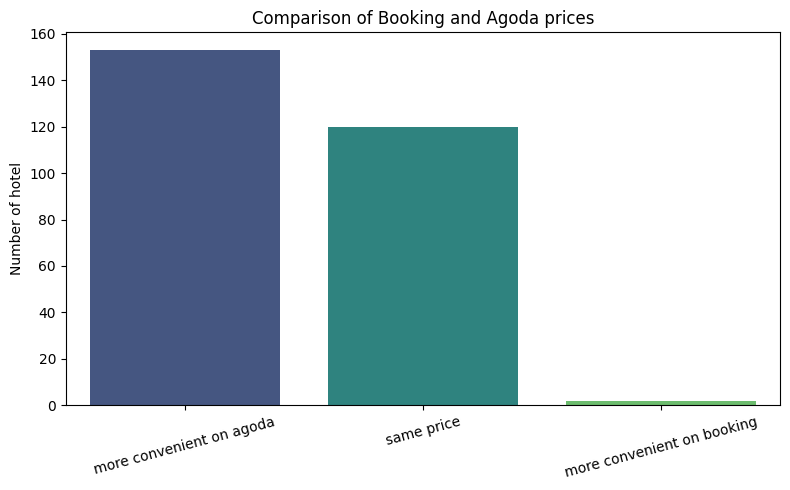

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conta quante volte ciascuna etichetta appare
conteggio_convenienza = matches_df_2_new['convenienza'].value_counts().reset_index()
conteggio_convenienza.columns = ['Portale più conveniente', 'Numero di hotel']

# Grafico
plt.figure(figsize=(8, 5))
sns.barplot(data=conteggio_convenienza, x='Portale più conveniente', y='Numero di hotel', palette='viridis')
plt.title('Comparison of Booking and Agoda prices')
plt.ylabel('Number of hotel')
plt.xlabel('')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the mean of the 'differenza_percentuale' column
media_differenza_percentuale = matches_df_2_new['differenza_percentuale'].mean()

# Print the result
print(f"La media della variabile 'differenza_percentuale' è: {media_differenza_percentuale}")

La media della variabile 'differenza_percentuale' è: 10.289806219110133


In [ ]:
# Differenza
matches_df_2_new['differenza'] = matches_df_2_new['prezzo_booking'] - matches_df_2_new['prezzo_agoda']
matches_df_2_new['differenza_assoluta'] = matches_df_2_new['differenza'].abs()

# Booking più caro
piu_caro_booking = matches_df_2_new[matches_df_2_new['differenza'] > 0]
# Agoda più caro
piu_caro_agoda = matches_df_2_new[matches_df_2_new['differenza'] < 0]

# Esempi
print("\nEsempi dove Booking è più caro:")
print(piu_caro_booking[['titolo_booking', 'prezzo_booking', 'prezzo_agoda', 'differenza']].head())

print("\nEsempi dove Agoda è più caro:")
print(piu_caro_agoda[['titolo_booking', 'prezzo_booking', 'prezzo_agoda', 'differenza']].head())

# Media delle differenze
media_diff = matches_df_2_new['differenza'].mean()
media_diff_assoluta = matches_df_2_new['differenza'].abs().mean()

print(f"\nIn media Booking è più caro di {media_diff:.2f} euro (positivo significa Booking più caro).")
print(f"In media la differenza assoluta è di {media_diff_assoluta:.2f} euro.")



Esempi dove Booking è più caro:
                    titolo_booking  prezzo_booking  prezzo_agoda  differenza
284  boutique campo de fiori hotel           499.0         470.0        29.0
283                 hotel napoleon           256.0         122.0       134.0
267             artistes des hotel           210.0         170.0        40.0
265             frattina residenza           210.0         172.0        38.0
264                 41 hotel trevi           210.0         177.0        33.0

Esempi dove Agoda è più caro:
                                       titolo_booking  prezzo_booking  \
64  capriolo con del dimora e favolosa giardino pa...           216.0   
86                   campo de fiori spanish suite the           255.0   

    prezzo_agoda  differenza  
64         228.0       -12.0  
86         316.0       -61.0  

In media Booking è più caro di 22.84 euro (positivo significa Booking più caro).
In media la differenza assoluta è di 23.37 euro.


In [ ]:
matches_df_2_new['percentuale_diff'] = (matches_df_2_new['differenza'] / matches_df_2_new['prezzo_booking']) * 100
media_percentuale_diff = matches_df_2_new['percentuale_diff'].mean()
media_percentuale_diff_assoluta = matches_df_2_new['percentuale_diff'].abs().mean()
print(f"In media Agoda è più conveniente del {abs(media_percentuale_diff):.2f}% rispetto a Booking (segno positivo = Booking più caro).")
print(f"In media la differenza percentuale assoluta è del {media_percentuale_diff_assoluta:.2f}%.")


In media Agoda è più conveniente del 10.29% rispetto a Booking (segno positivo = Booking più caro).
In media la differenza percentuale assoluta è del 10.50%.


In [ ]:
#questaaaaaaaaaaa
import pandas as pd

# Supponiamo che matches_df_2_new sia già caricato
# matches_df_2_new = pd.read_csv("tuo_file.csv")

# Calcola la differenza di prezzo per ciascun record
matches_df_2_new["differenza_prezzo"] = matches_df_2_new["prezzo_agoda"] - matches_df_2_new["prezzo_booking"]

# Calcola la media della differenza
media_differenza = matches_df_2_new["differenza_prezzo"].mean()

# Calcola la percentuale media di differenza rispetto al prezzo booking
matches_df_2_new["percentuale_differenza"] = matches_df_2_new["differenza_prezzo"] / matches_df_2_new["prezzo_booking"] * 100

# Media della percentuale
media_percentuale = matches_df_2_new["percentuale_differenza"].mean()

print(f"La differenza media di prezzo è {media_differenza:.2f} euro.")
print(f"La differenza media percentuale è {media_percentuale:.2f}%.")


La differenza media di prezzo è -22.84 euro.
La differenza media percentuale è -10.29%.


In [ ]:
# Raggruppa per città e calcola la media dei prezzi su Agoda e Booking
prezzi_medi = matches_df_2_new.groupby('città_agoda')[['prezzo_agoda', 'prezzo_booking']].mean()

print(prezzi_medi)


             prezzo_agoda  prezzo_booking
città_agoda                              
roma           193.777251      223.464455
terni           99.046875       99.328125


# individua outliers

In [ ]:
def trova_outlier_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # restituisce un booleano: True se è outlier
    return (series < lower_bound) | (series > upper_bound)

# Trova outlier su entrambe le colonne
outlier_agoda = trova_outlier_iqr(matches_df_2_new['prezzo_agoda'])
outlier_booking = trova_outlier_iqr(matches_df_2_new['prezzo_booking'])

# Tutti gli outlier (su almeno una delle due colonne)
outliers = outlier_agoda | outlier_booking

print(f"Numero totale outlier: {outliers.sum()}")

# Mostra gli outlier
print(matches_df_2_new[outliers])


Numero totale outlier: 15
     index_booking  index_agoda  id_booking  id_agoda  \
284            881          652         881       652   
256            777          140         777       140   
72             103          667         103       667   
69              97          624          97       624   
89             210          556         210       556   
93             222          380         222       380   
110            297          552         297       552   
109            292          292         292       292   
133            371          658         371       658   
149            433          660         433       660   
156            451          553         451       553   
187            562          269         562       269   
183            551          412         551       412   
200            610          558         610       558   
273            839          411         839       411   

                                        titolo_booking  \
284

In [ ]:
# Dataframe senza outlier
df_senza_outlier = matches_df_2_new[~outliers]

# Calcolo prezzi medi senza outlier
prezzi_medi_no_outlier = df_senza_outlier.groupby('città_agoda')[['prezzo_agoda', 'prezzo_booking']].mean()

print(prezzi_medi_no_outlier)


             prezzo_agoda  prezzo_booking
città_agoda                              
roma           171.494898      200.219388
terni           99.046875       99.328125
